In [1]:
from path_setup import add_project_root_to_path

add_project_root_to_path()

Project root added to sys.path: /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline


In [11]:
from pipeline.utils.path_manager import PathManager
from pipeline.utils.visualization import analyze_tail_posture_changes, generate_tail_posture_subplots
from pipeline.utils.data_analysis_utils import sorting_key, load_monitoring_pipeline_results, aggregate_pipeline_montioring_results

path_manager = PathManager()

path_to_config_files = path_manager.path_to_config_files
path_to_piglet_rearing_info = path_manager.path_to_piglet_rearing_info
path_to_pipeline_outputs = path_manager.path_to_monitoring_pipeline_outputs
path_to_result_data_aggregations = path_manager.path_to_pipeline_results_aggregations

### Data Preparation


In [3]:
# load data
pipeline_monitoring_results = load_monitoring_pipeline_results(
    path_to_pipeline_outputs, path_to_config_files)

In [4]:
# Sort the monitoring_results by pen number and then by start date
pipeline_monitoring_results.sort(key=sorting_key)

In [5]:
# print datespans of every analysis
for i, data in enumerate(pipeline_monitoring_results[:5]):
    print("Datespan Index " + str(i) + ": " + data["date_span"])
    print("Camera Index " + str(i) + ": " + data["camera"])
    print("")


Datespan Index 0: 211228_220119
Camera Index 0: Kamera1

Datespan Index 1: 220228_220328
Camera Index 1: Kamera1

Datespan Index 2: 220505_220530
Camera Index 2: Kamera1

Datespan Index 3: 220726_220831
Camera Index 3: Kamera1

Datespan Index 4: 221003_221106
Camera Index 4: Kamera1



### ECPLF plots


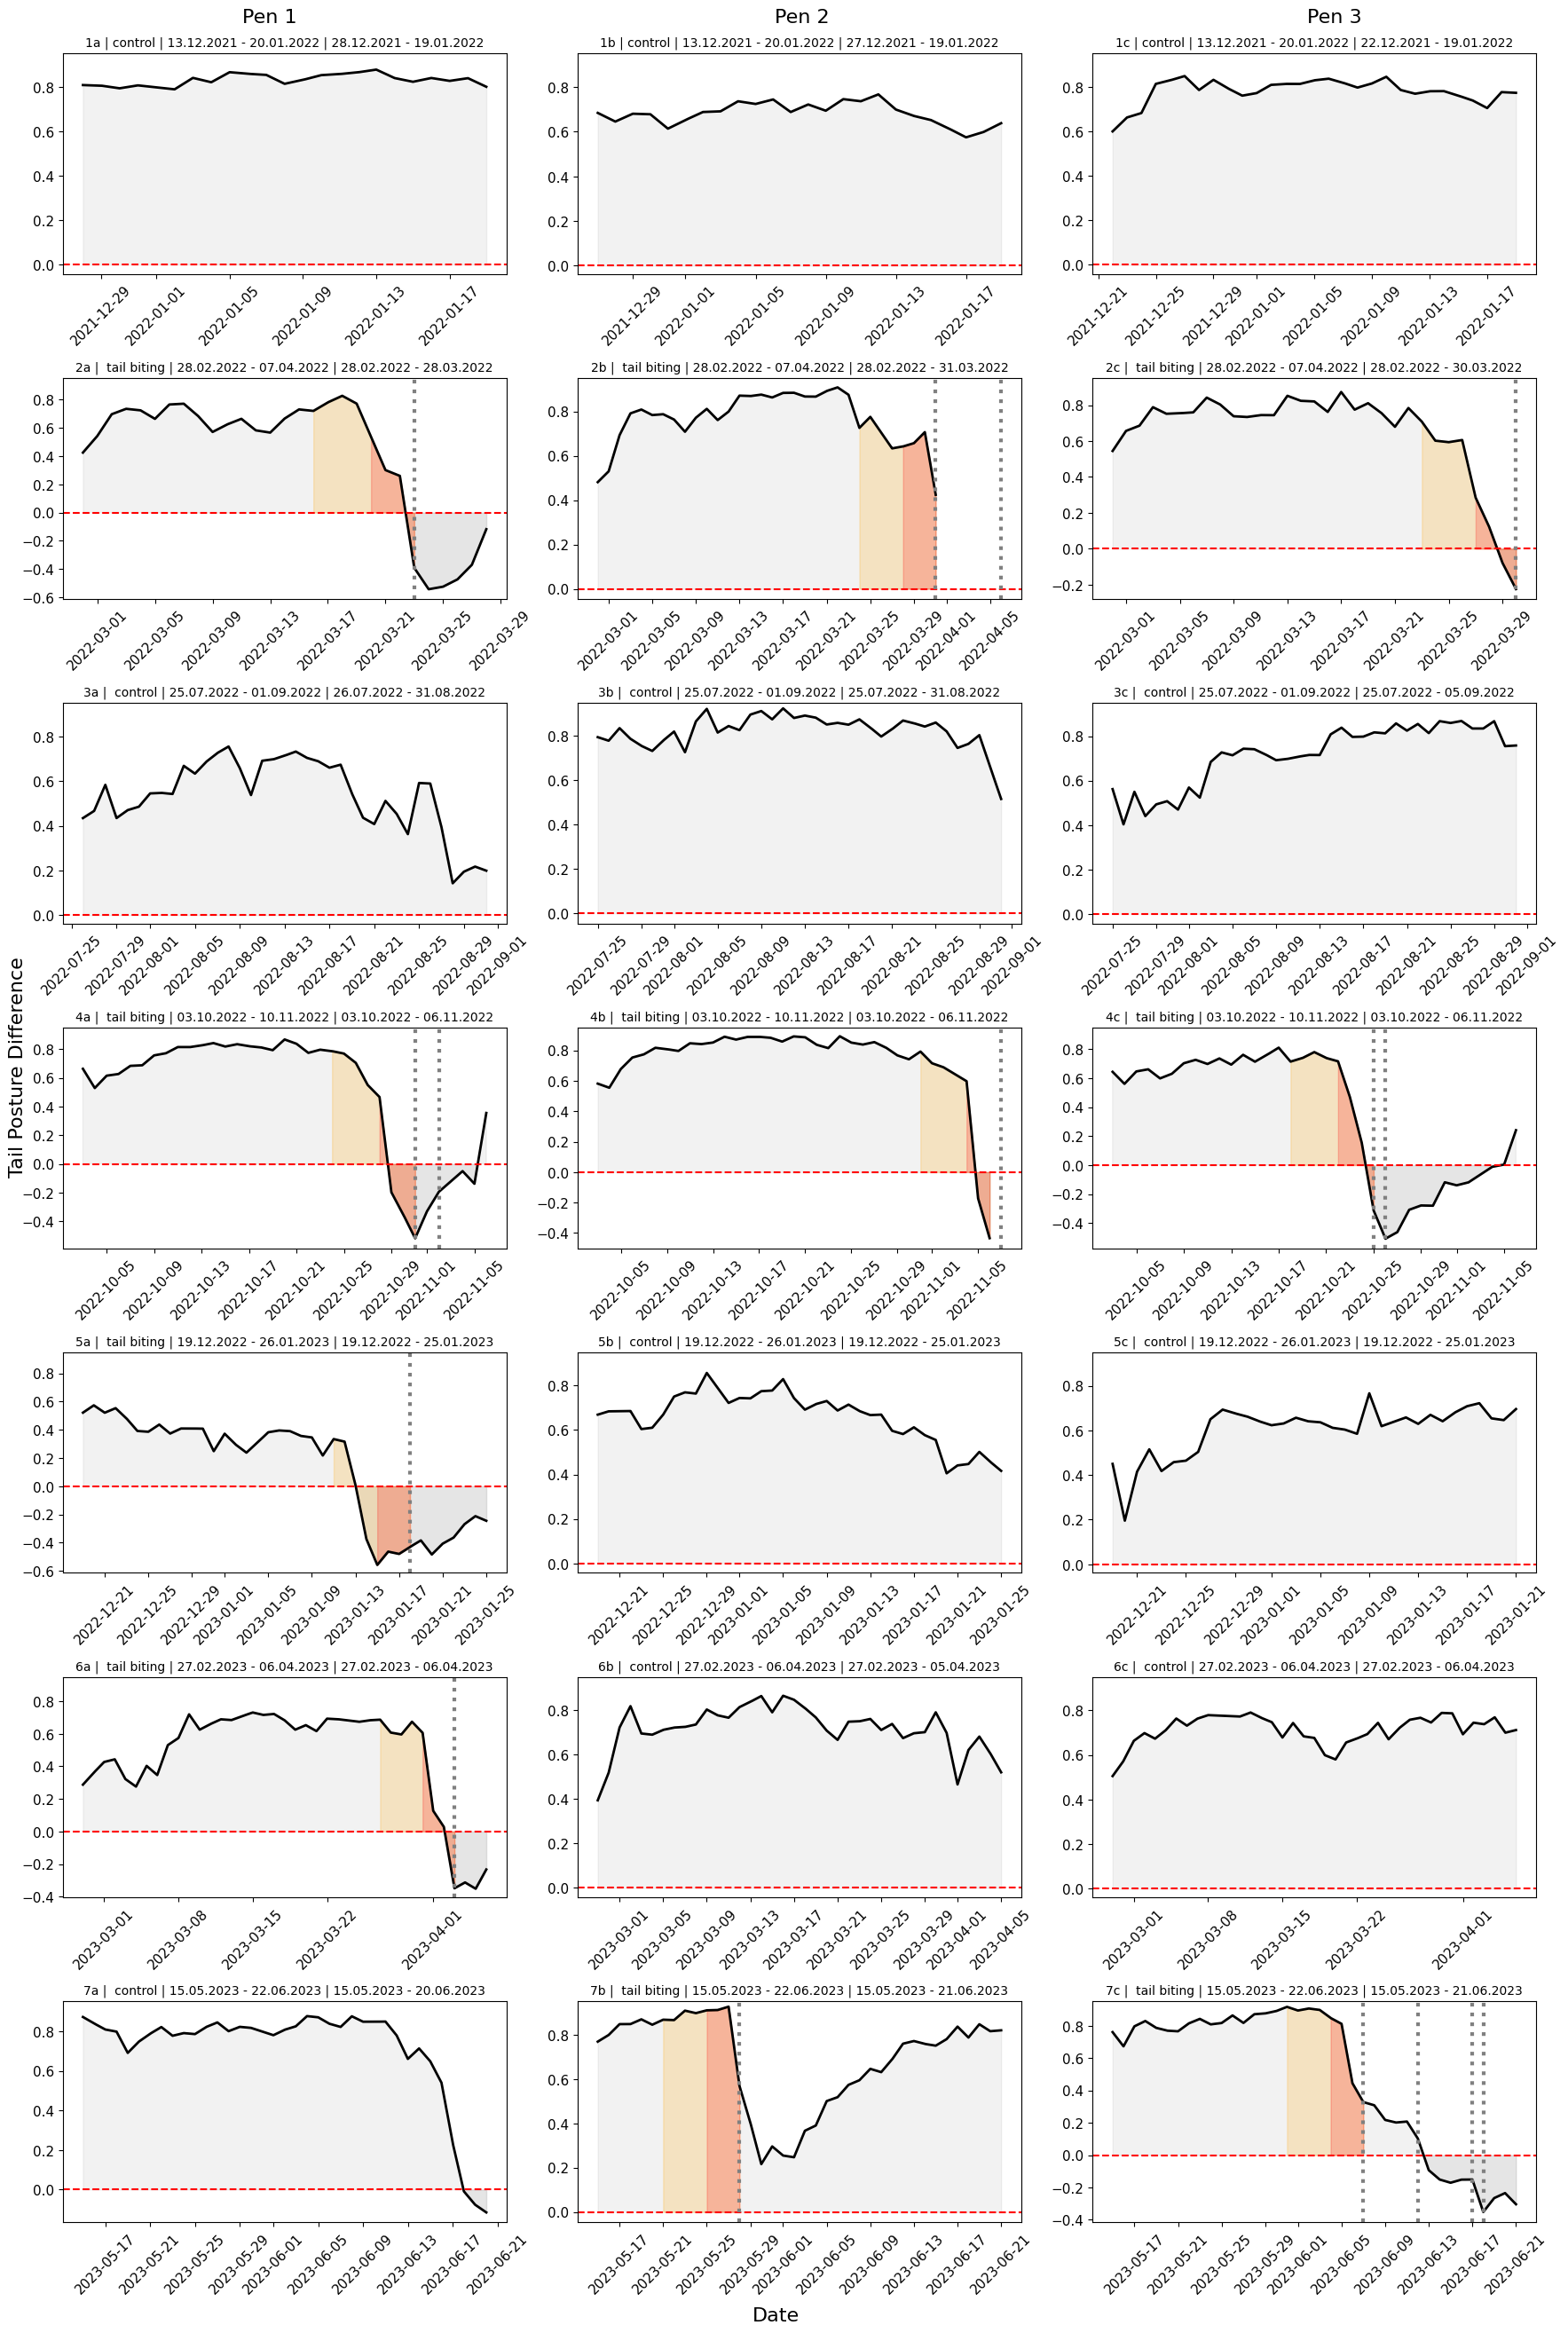

In [9]:
generate_tail_posture_subplots(pipeline_monitoring_results, [
                               "Kamera1", "Kamera2", "Kamera3"], path_to_piglet_rearing_info, resample_freq="D", skip_datespans=["220509_220616"], normalize=True, rolling_window=None)

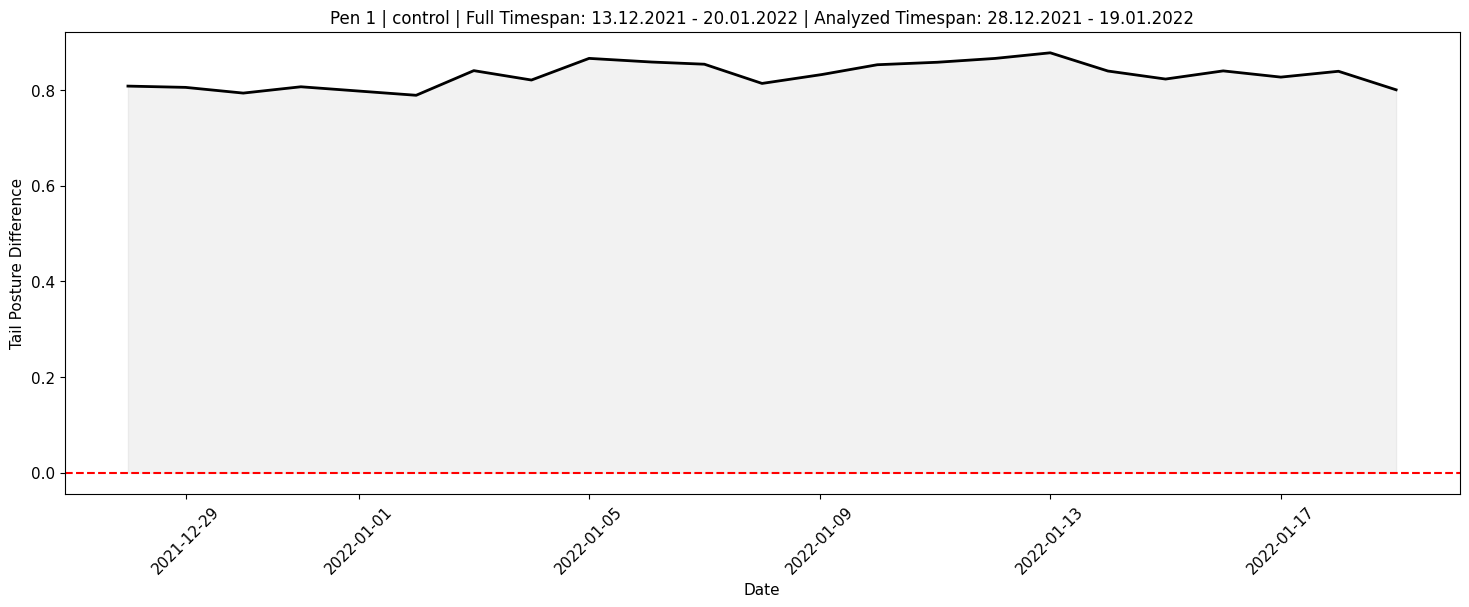

In [11]:
for result in pipeline_monitoring_results:
    analyze_tail_posture_changes(result, path_to_piglet_rearing_info,
                                 resample_freq="D", normalize=True, rolling_window=None)
    break

### Save aggregated data


In [10]:
for result in pipeline_monitoring_results:
    aggregate_pipeline_montioring_results(
        result, path_to_result_data_aggregations=path_to_result_data_aggregations, normalize=True, resample_freq="D", rolling_window=None, save_data=True)

Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/211228_220119
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220228_220328
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220505_220530
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/220726_220831
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/piglet_rearing/Kamera1/221003_221106
Data transformed and saved to /Users/jan-hendrikwitte/Documents/DigiSchwein/pig_monitoiring_pipeline/pipeline_outputs/data_aggregation/pigle